**Learning Python for Artificial Intelligence and Data Science**

**Lecture: Reinforcement Learning and Deep Q-Network (DQN)**

**By Allen Y. Yang, PhD**

(c) Copyright Intelligent Racing Inc., 2020-2024. All rights reserved. Materials may NOT be distributed or used for any commercial purposes.

## Introduction
Reinforcement Learning (RL) is a powerful machine learning paradigm inspired by how agents learn to act in an environment through trial and error. In this notebook, we explore the core concepts of RL, the Bellman equation, and Deep Q-Networks (DQN). We will train an agent using DQN on the classic CartPole-v1 environment from OpenAI's `gym`.

### What Makes Reinforcement Learning Special?

Unlike supervised learning where we have labeled data (like pictures of cats labeled "cat"), or unsupervised learning where we find patterns in data, reinforcement learning is about **learning from interaction**. Think of it like learning to ride a bicycle:

- You don't have a dataset of "correct" bicycle movements
- You learn by trying, falling, and adjusting
- You get feedback (rewards) - staying balanced feels good, falling hurts
- Over time, you develop a strategy (policy) for riding successfully

### Real-World Examples of Reinforcement Learning

1. **Video Games**: Game AI that learns to play chess, Go, or video games
2. **Robotics**: Robots learning to walk, grasp objects, or navigate
3. **Finance**: Trading algorithms that learn optimal investment strategies
4. **Healthcare**: Treatment planning that adapts to patient responses
5. **Autonomous Vehicles**: Learning to drive safely in various conditions

## Reinforcement Learning Basics

### The RL Framework

Imagine you're playing a video game. At each moment:
1. You see the current game screen (the **state**)
2. You decide what button to press (the **action**)
3. The game responds with points and a new screen (the **reward** and **next state**)

This cycle continues until the game ends. RL algorithms learn to maximize the total score!

### Key Components

An RL problem is typically modeled as a **Markov Decision Process (MDP)**. The agent interacts with an environment over discrete time steps.

- **State (s)**: Current situation of the agent.
- **Action (a)**: Choices available to the agent.
- **Reward (r)**: Feedback from the environment.
- **Policy (π)**: Strategy used by the agent.
- **Q-Value**: Expected future rewards given a state and action.

### Understanding States, Actions, and Rewards

Let's use a simple example: **Teaching a Dog to Fetch**

- **States**: Where is the ball? Where is the dog? Is the dog holding the ball?
- **Actions**: Run forward, turn left/right, pick up ball, drop ball
- **Rewards**: 
  - +10 for bringing ball back to owner
  - +1 for picking up the ball
  - -0.1 for each time step (encourages efficiency)
  - -5 for running into obstacles

The dog (agent) learns which actions in which states lead to the most treats (rewards)!

## Markov Decision Process (MDP)

### What is the Markov Property?

The Markov property states that **"the future depends only on the present, not the past."** In other words, if you know the current state, you have all the information needed to predict what happens next.

### Simple Example: Weather Prediction

Imagine a simplified weather system with only three states:
- ☀️ Sunny
- ☁️ Cloudy 
- 🌧️ Rainy

With the Markov property, tomorrow's weather depends ONLY on today's weather, not on last week's weather pattern.

```
Today is Sunny → Tomorrow: 70% Sunny, 20% Cloudy, 10% Rainy
Today is Cloudy → Tomorrow: 30% Sunny, 40% Cloudy, 30% Rainy
Today is Rainy → Tomorrow: 20% Sunny, 30% Cloudy, 50% Rainy
```

### Why is this Important for RL?

In our CartPole example:
- The **state** includes: cart position, cart velocity, pole angle, pole velocity
- This state contains ALL information needed to decide the next action
- We don't need to know how the pole got to this angle - just the current state!

### MDP Components

A Markov Decision Process consists of:

1. **S**: Set of all possible states
2. **A**: Set of all possible actions
3. **P(s'|s,a)**: Probability of reaching state s' from state s after taking action a
4. **R(s,a,s')**: Reward received for going from state s to s' via action a
5. **γ (gamma)**: Discount factor (0 ≤ γ ≤ 1) - how much we value future rewards

### The Discount Factor (γ)

Why do we discount future rewards? Consider this choice:
- Option A: Get $100 today
- Option B: Get $100 in one year

Most people prefer Option A! In RL:
- γ = 0: Only care about immediate rewards (very short-sighted)
- γ = 0.9: Future rewards are worth 90% of immediate rewards
- γ = 1: Future rewards are just as valuable as immediate rewards

In our code, we use γ = 0.95, meaning rewards 10 steps in the future are worth about 60% of immediate rewards (0.95^10 ≈ 0.60).

## The Q-Function (Action-Value Function)

### What is a Q-Value?

The Q-value answers the question: **"If I'm in state s and take action a, what's my expected total future reward?"**

Think of it as a crystal ball that tells you the long-term value of each action!

### Intuitive Example: Choosing a Route to School

You're at an intersection (state) and can go:
- **Left** (action 1): Usually fast, but sometimes has traffic
- **Right** (action 2): Always slow but reliable
- **Straight** (action 3): Medium speed, occasional construction

The Q-values might be:
- Q(intersection, left) = -15 minutes (average time)
- Q(intersection, right) = -20 minutes
- Q(intersection, straight) = -17 minutes

The best action is 'left' because it has the highest Q-value (least negative = shortest time)!

### Mathematical Definition

The Q-function is defined as:

$$Q^\pi(s,a) = \mathbb{E}[R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} + ... | S_t = s, A_t = a]$$

Where:
- $Q^\pi(s,a)$ is the Q-value for state s and action a under policy π
- $\mathbb{E}$ means "expected value" (average)
- $R_t, R_{t+1}, ...$ are future rewards
- $\gamma$ is the discount factor

### Why Q-Values are Powerful

Once we know all Q-values, choosing actions is easy:
- Just pick the action with the highest Q-value!
- This gives us the optimal policy: $\pi^*(s) = \arg\max_a Q^*(s,a)$

## The Bellman Equation

The Bellman Equation provides a recursive decomposition for computing Q-values:

$$Q(s_t, a) = r(s_t, a) + \gamma \max_{a'} Q(s_{t+1}, a')$$

Where $\gamma$ is the discount factor.

### Understanding the Bellman Equation

This equation says: **"The value of an action = immediate reward + discounted value of the best future action"**

### Step-by-Step Example: Treasure Hunt Game

Imagine a simple game on a 3x1 grid:
```
[Start] → [Middle] → [Treasure!]
```

- Being at Treasure gives +10 reward
- Each move costs -1 (time penalty)
- Discount factor γ = 0.9

Let's calculate Q-values backward:

1. **At Middle position:**
   - Q(Middle, go_right) = -1 + 0.9 × 10 = 8
   - Q(Middle, go_left) = -1 + 0.9 × 0 = -1

2. **At Start position:**
   - Q(Start, go_right) = -1 + 0.9 × max(8, -1) = -1 + 7.2 = 6.2

This tells us: Starting from 'Start', the value of going right is 6.2!

### Why is this Recursive?

Notice how we used the Q-value of the next state to calculate the current Q-value. This is the power of the Bellman equation - it breaks down a complex problem into simpler subproblems!

## From Q-Learning to Deep Q-Networks

### Traditional Q-Learning

In simple environments, we could store Q-values in a table:

| State | Action | Q-Value |
|-------|--------|----------|
| State1 | Left   | 5.2     |
| State1 | Right  | 3.1     |
| State2 | Left   | 7.8     |
| ...    | ...    | ...     |

But what if we have millions of states? Or continuous states like CartPole (pole angle can be any value)?

### Enter Neural Networks!

Instead of a table, we use a neural network to approximate Q-values:
- **Input**: Current state (e.g., [cart_position, cart_velocity, pole_angle, pole_velocity])
- **Output**: Q-value for each possible action (e.g., [Q(state, left), Q(state, right)])

This is a **Deep Q-Network (DQN)**!

### How DQN Learns

1. **Experience**: Agent tries actions and stores experiences (state, action, reward, next_state)
2. **Replay**: Randomly sample past experiences to learn from
3. **Update**: Adjust neural network weights to better predict Q-values
4. **Explore vs Exploit**: Sometimes try random actions (explore) vs choosing best known action (exploit)

### The Exploration-Exploitation Trade-off

Imagine you're at a new ice cream shop:
- **Exploit**: Always order vanilla (you know it's good)
- **Explore**: Try new flavors (might find something better!)

In our code:
- ε (epsilon) = probability of exploring (trying random action)
- Starts at 1.0 (100% exploration) and decays to 0.01 (1% exploration)
- This ensures we explore early but exploit our knowledge later!

## The CartPole Environment

### What is CartPole?

CartPole is like balancing a broomstick on your hand:
- A cart can move left or right on a track
- A pole is attached to the cart with a hinge
- Goal: Keep the pole upright as long as possible!

### State Space (What the Agent Sees)

The state consists of 4 numbers:
1. **Cart Position**: How far left/right is the cart? (-2.4 to 2.4)
2. **Cart Velocity**: How fast is the cart moving?
3. **Pole Angle**: How tilted is the pole? (in radians)
4. **Pole Angular Velocity**: How fast is the pole rotating?

### Action Space (What the Agent Can Do)

Only 2 actions:
- 0: Push cart to the LEFT
- 1: Push cart to the RIGHT

### Rewards

- +1 for every timestep the pole remains upright
- Episode ends (and we give -10 penalty in our code) if:
  - Pole angle exceeds ±12°
  - Cart moves beyond ±2.4 units
  - 500 timesteps pass (solved!)

### Why is CartPole Challenging?

- **Non-linear dynamics**: Small changes can have big effects
- **Delayed consequences**: Moving left now might cause a fall later
- **Continuous states**: Infinite possible positions/angles
- **Balance trade-off**: Must balance pole AND keep cart centered

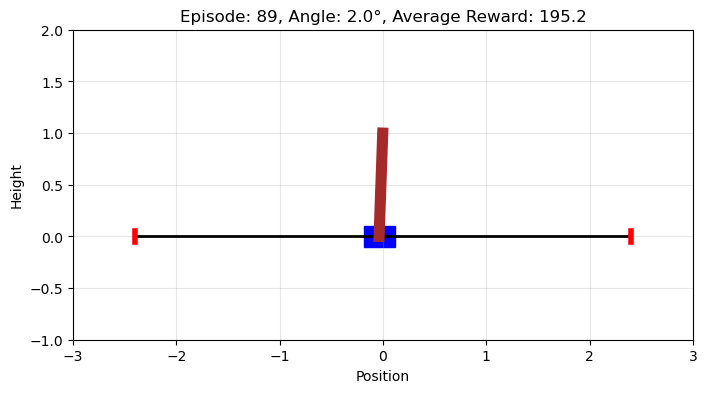

KeyboardInterrupt: 

In [10]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import warnings
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import time as time_module  # Rename to avoid conflict
warnings.filterwarnings('ignore')

EPISODES = 100
RENDER_EVERY = 10  # Render every N episodes to see progress

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)

        states = np.vstack([m[0] for m in minibatch])
        actions = [m[1] for m in minibatch]
        rewards = [m[2] for m in minibatch]
        next_states = np.vstack([m[3] for m in minibatch])
        dones = [m[4] for m in minibatch]

        # Batch prediction for efficiency
        target = self.model.predict(states, verbose=0)
        target_next = self.model.predict(next_states, verbose=0)

        for i in range(batch_size):
            if dones[i]:
                target[i][actions[i]] = rewards[i]
            else:
                target[i][actions[i]] = rewards[i] + self.gamma * np.amax(target_next[i])

        self.model.fit(states, target, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

# Try different ways to create the environment
env = None
render_method = None

# Method 1: Try with old API
try:
    env = gym.make('CartPole-v1')
    env.reset()
    env.render(mode='rgb_array')
    render_method = 'old_rgb'
    print("Using old render API with rgb_array mode")
except:
    pass

# Method 2: Try default render
if env is None or render_method is None:
    try:
        env = gym.make('CartPole-v1')
        env.reset()
        env.render()
        render_method = 'old_default'
        print("Using old render API with default mode")
    except:
        pass

# Method 3: Just create environment without render
if env is None:
    env = gym.make('CartPole-v1')
    render_method = 'manual'
    print("Created environment, will attempt manual visualization")

print(render_method)
# Test reset to check API version
state_or_tuple = env.reset()
if isinstance(state_or_tuple, tuple):
    state, _ = state_or_tuple
    uses_new_api = True
else:
    state = state_or_tuple
    uses_new_api = False

print(f"API version: {'new' if uses_new_api else 'old'}")

# Function to get frame based on render method
def get_frame(env, render_method):
    try:
        if render_method == 'old_rgb':
            return env.render(mode='rgb_array')
        elif render_method == 'old_default':
            # Try to get rgb_array even if not default
            try:
                return env.render(mode='rgb_array')
            except:
                return None
        else:
            return None
    except:
        return None

# Manual visualization fallback
def draw_cartpole_state(episode, state, average):
    """Manually draw the cartpole state"""
    cart_pos = state[0]
    pole_angle = state[2]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Set up the plot
    ax.set_xlim(-3, 3)
    ax.set_ylim(-1, 2)
    ax.set_aspect('equal')
    
    # Draw track
    ax.plot([-2.4, 2.4], [0, 0], 'k-', linewidth=2)
    ax.plot([-2.4, -2.4], [-0.05, 0.05], 'r-', linewidth=4)
    ax.plot([2.4, 2.4], [-0.05, 0.05], 'r-', linewidth=4)
    
    # Draw cart
    cart_width = 0.3
    cart_height = 0.2
    cart = plt.Rectangle((cart_pos - cart_width/2, -cart_height/2), 
                        cart_width, cart_height, 
                        fill=True, color='blue')
    ax.add_patch(cart)
    
    # Draw pole
    pole_length = 1.0
    pole_end_x = cart_pos + pole_length * np.sin(pole_angle)
    pole_end_y = pole_length * np.cos(pole_angle)
    ax.plot([cart_pos, pole_end_x], [0, pole_end_y], 'brown', linewidth=8)
    
    # Add pole joint
    circle = plt.Circle((cart_pos, 0), 0.05, color='black')
    ax.add_patch(circle)
    
    # Add title
    ax.set_title(f'Episode: {episode}, Angle: {np.degrees(pole_angle):.1f}°, Average Reward: {average}')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Position')
    ax.set_ylabel('Height')
    
    return fig

# Run one episode
angle = state[2]
angle_velocity = state[3]
integral = 0.0
prev_error = angle
batch_size = 32
scores = []  # Store scores for plotting


print("\nRunning CartPole with PID Controller...")
print("Watch the game below:\n")

state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)

for e in range(EPISODES):

    # Test reset to check API version
    state_or_tuple = env.reset()
    if uses_new_api:
        state, _ = state_or_tuple
    else:
        state = state_or_tuple

    state = np.reshape(state, [1, state_size])
    # Determine if we should render this episode
    render_this_episode = (e % RENDER_EVERY == 0) or (e >= EPISODES - 5)
    
    if render_this_episode:
        print(f"\n🎮 Rendering Episode {e+1}/{EPISODES}")

    for step in range(500): 

        # DQN control
        action = agent.act(state)
    
        # Step environment
        if uses_new_api:
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
        else:
            next_state, reward, done, info = env.step(action)

        if step % 10 == 0 or done:
            clear_output(wait=True)
            
            # Try to get frame
            frame = get_frame(env, render_method)
            
            if frame is not None:
                # Display captured frame
                plt.figure(figsize=(8, 6))
                plt.imshow(frame)
                plt.axis('off')
                plt.title(f'Step: {step+1}')
                plt.pause(0.001)
            else:
                # Use manual visualization
                fig = draw_cartpole_state(e, next_state, np.mean(scores[-10:]))
                plt.pause(0.001)
                plt.close()            

        reward = reward if not done else -10
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)

        # Update state
        state = next_state

        if done:
        
            scores.append(step + 1)
            print(f"Episode: {e+1}/{EPISODES}, Score: {step+1}, ε: {agent.epsilon:.3f}")
                
            # Print progress bar
            if (e + 1) % 10 == 0:
                avg_score = np.mean(scores[-10:])
                print(f"📊 Last 10 episodes average: {avg_score:.1f}")
                    
            break

        # Train the agent
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

env.close()

print("\n" + "=" * 50)
print("Training Complete!")
print(f"Final average score (last 10 episodes): {np.mean(scores[-10:]):.1f}")
print(f"Best score achieved: {max(scores)}")
print("=" * 50)

# Optional: Plot learning curve
try:
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    plt.plot(scores, alpha=0.6, label='Episode scores')
    
    # Calculate rolling average
    window = 10
    rolling_avg = [np.mean(scores[max(0, i-window+1):i+1]) for i in range(len(scores))]
    plt.plot(rolling_avg, linewidth=2, label=f'{window}-episode average')
    
    plt.xlabel('Episode')
    plt.ylabel('Score')
    plt.title('DQN Learning Progress on CartPole-v1')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.pause(0.001)
except ImportError:
    print("Matplotlib not available for plotting")

## Understanding the Code

### Key Components of Our DQN Implementation

1. **Experience Replay Memory**
   - `self.memory = deque(maxlen=2000)`: Stores past experiences
   - Why? Learning from random samples breaks correlation between consecutive experiences
   - Like studying with flashcards in random order vs. sequential order

2. **Neural Network Architecture**
   - Input layer: 4 neurons (state size)
   - Hidden layers: Two layers with 24 neurons each
   - Output layer: 2 neurons (one Q-value per action)
   - Activation: ReLU for hidden layers, linear for output

3. **Epsilon-Greedy Strategy**
   - `self.epsilon = 1.0`: Start with 100% exploration
   - `self.epsilon_decay = 0.995`: Reduce exploration by 0.5% each time
   - `self.epsilon_min = 0.01`: Always keep 1% exploration

4. **Learning Process**
   - **Act**: Choose action using current policy
   - **Step**: Execute action, observe reward and next state
   - **Remember**: Store experience in memory
   - **Replay**: Learn from random batch of past experiences

### The Training Loop Explained

For each episode:
1. Reset environment to starting position
2. Until pole falls or time limit:
   - Agent observes current state
   - Agent chooses action (push left or right)
   - Environment responds with new state and reward
   - Agent stores this experience
   - Agent learns from past experiences (if enough collected)
3. Track performance and adjust exploration rate

## Practical Tips and Common Challenges

### Why Might Training Fail?

1. **Too Much Exploration**: If epsilon stays high, agent keeps acting randomly
2. **Too Little Exploration**: Agent gets stuck in suboptimal strategy
3. **Poor Reward Design**: In our code, we give -10 for falling (encourages survival)
4. **Insufficient Memory**: Small replay buffer might not capture diverse experiences

### Hyperparameters to Tune

- **Learning Rate** (0.001): How big are the weight updates?
  - Too high: Unstable learning
  - Too low: Slow learning

- **Batch Size** (32): How many experiences to learn from at once?
  - Larger: More stable but slower
  - Smaller: Faster but noisier

- **Network Size** (24 neurons × 2 layers): Model complexity
  - Larger: Can learn complex patterns but might overfit
  - Smaller: Faster, but might not capture all patterns

### Signs of Successful Learning

1. **Increasing Average Score**: Rolling average improves over time
2. **Decreasing Variance**: Performance becomes more consistent
3. **Strategic Behavior**: Agent develops recognizable patterns (e.g., gentle corrections)
4. **Robust Performance**: Agent handles various starting conditions

## Extensions and Advanced Topics

### Improvements to Basic DQN

1. **Double DQN**: Reduces overestimation of Q-values
2. **Dueling DQN**: Separately estimates state value and action advantages
3. **Prioritized Experience Replay**: Learn more from surprising experiences
4. **Target Networks**: Separate network for generating targets (more stable)

### Other RL Algorithms

- **Policy Gradient Methods**: Directly learn the policy instead of Q-values
- **Actor-Critic**: Combine value-based and policy-based methods
- **PPO (Proximal Policy Optimization)**: State-of-the-art for continuous control
- **SAC (Soft Actor-Critic)**: Works well for robotic control

### Real-World Applications

1. **Robotics**: Teaching robots to walk, grasp, or manipulate objects
2. **Game AI**: AlphaGo, OpenAI Five (Dota 2), StarCraft II
3. **Resource Management**: Data center cooling, traffic light control
4. **Finance**: Portfolio optimization, algorithmic trading
5. **Healthcare**: Treatment recommendation, drug discovery

## Conclusion

In this notebook, we explored the fundamental concepts of reinforcement learning and implemented a Deep Q-Network (DQN) using TensorFlow and OpenAI Gym. 

### Key Takeaways

1. **RL is Learning from Interaction**: Unlike supervised learning, RL agents learn by trying and receiving feedback
2. **Markov Property Simplifies Problems**: Future depends only on present, not entire history
3. **Q-Values Guide Decisions**: They tell us the long-term value of actions
4. **Neural Networks Enable Scaling**: DQN can handle complex, continuous state spaces
5. **Balance is Key**: Exploration vs exploitation, immediate vs future rewards

### What's Next?

- Try modifying hyperparameters and observe the effects
- Implement improvements like target networks or double DQN
- Apply DQN to other Gym environments (MountainCar, LunarLander)
- Explore policy gradient methods for continuous action spaces

Remember: RL is as much art as science. Experiment, observe, and iterate!

### Exercises for Practice

1. **Modify the Reward**: What happens if you give +0.1 for staying centered?
2. **Change Network Architecture**: Try 3 hidden layers or different sizes
3. **Adjust Exploration**: What if epsilon decays faster or slower?
4. **Visualize Q-Values**: Plot how Q-values change during training
5. **Compare Algorithms**: Implement a simple Q-table for CartPole (discretize states)